## Prepare Environment

In [1]:
# import ribosome depletion code package
import sys, os
import numpy as np
import ribodeplete as rd
# load matplotlib plotting functions
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# set figure output sizes for easy viewing
params = {'axes.titlesize':11,
          'xtick.labelsize':9,
          'ytick.labelsize':9,
          'axes.labelsize': 10}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['pdf.fonttype'] = 42
sns.set_style(style='ticks')

In [3]:
genome_paths = ['genomes/Bs_168.gb','genomes/Cc_na1000.gb','genomes/Ec_mg1655v3.gb','genomes/Ms_mc2155.gb',
                'genomes/Mtb_h37rv.gb', 'genomes/Pa_14.gb', 'genomes/Rp_portsmouth.gb', 'genomes/Sa_nctc8325.gb']
output_names, output_sequences = rd.alignrRNA(genome_paths, True)
rd.writeFasta('all_16S.fasta', output_names[0], output_sequences[0])
rd.writeFasta('all_23S.fasta', output_names[1], output_sequences[1])

Bacillus subtilis subsp. subtilis str. 168 complete genome
number of loci: 10/10/10 (16S/23S/5S)
duplicate: 0/1/6
Caulobacter crescentus NA1000, complete genome
number of loci: 2/2/2 (16S/23S/5S)
duplicate: 1/0/1
Escherichia coli str. K-12 substr. MG1655, complete genome
number of loci: 7/7/8 (16S/23S/5S)
duplicate: 1/1/4
Mycobacterium smegmatis str. MC2 155 chromosome, complete genome
number of loci: 2/2/2 (16S/23S/5S)
duplicate: 1/0/0
Mycobacterium tuberculosis H37Rv, complete genome
number of loci: 1/1/1 (16S/23S/5S)
duplicate: 0/0/0
Pseudomonas aeruginosa UCBPP-PA14, complete genome
number of loci: 4/4/4 (16S/23S/5S)
duplicate: 3/1/3
Rickettsia parkeri str. Portsmouth, complete genome
number of loci: 1/1/1 (16S/23S/5S)
duplicate: 0/0/0
Staphylococcus aureus strain NCTC8325 genome assembly, chromosome: 1
number of loci: 6/6/7 (16S/23S/5S)
duplicate: 2/2/6


'all_23S.fasta'

## 16S as used to find depletion probes

Below are settings used to identify probes used to deplete rRNA. Probes are plotted and outputted into an included .csv file.

In [4]:
opt_kwargs = {'n_probes':500, 'probe_mutation_steps':25, 'optimization_cycles':100,
              'target_tm':62.5, 'tm_dist':norm, 'tm_dist_kwargs':{'loc':62.5,'scale':2,},
              'probe_start_len':(15,25), 'show_plots':[25,50,75,100]}
align_obj = rd.optimizeprobes('all_16S.fasta',**opt_kwargs)

/home/culviner/common_py3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/culviner/common_py3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


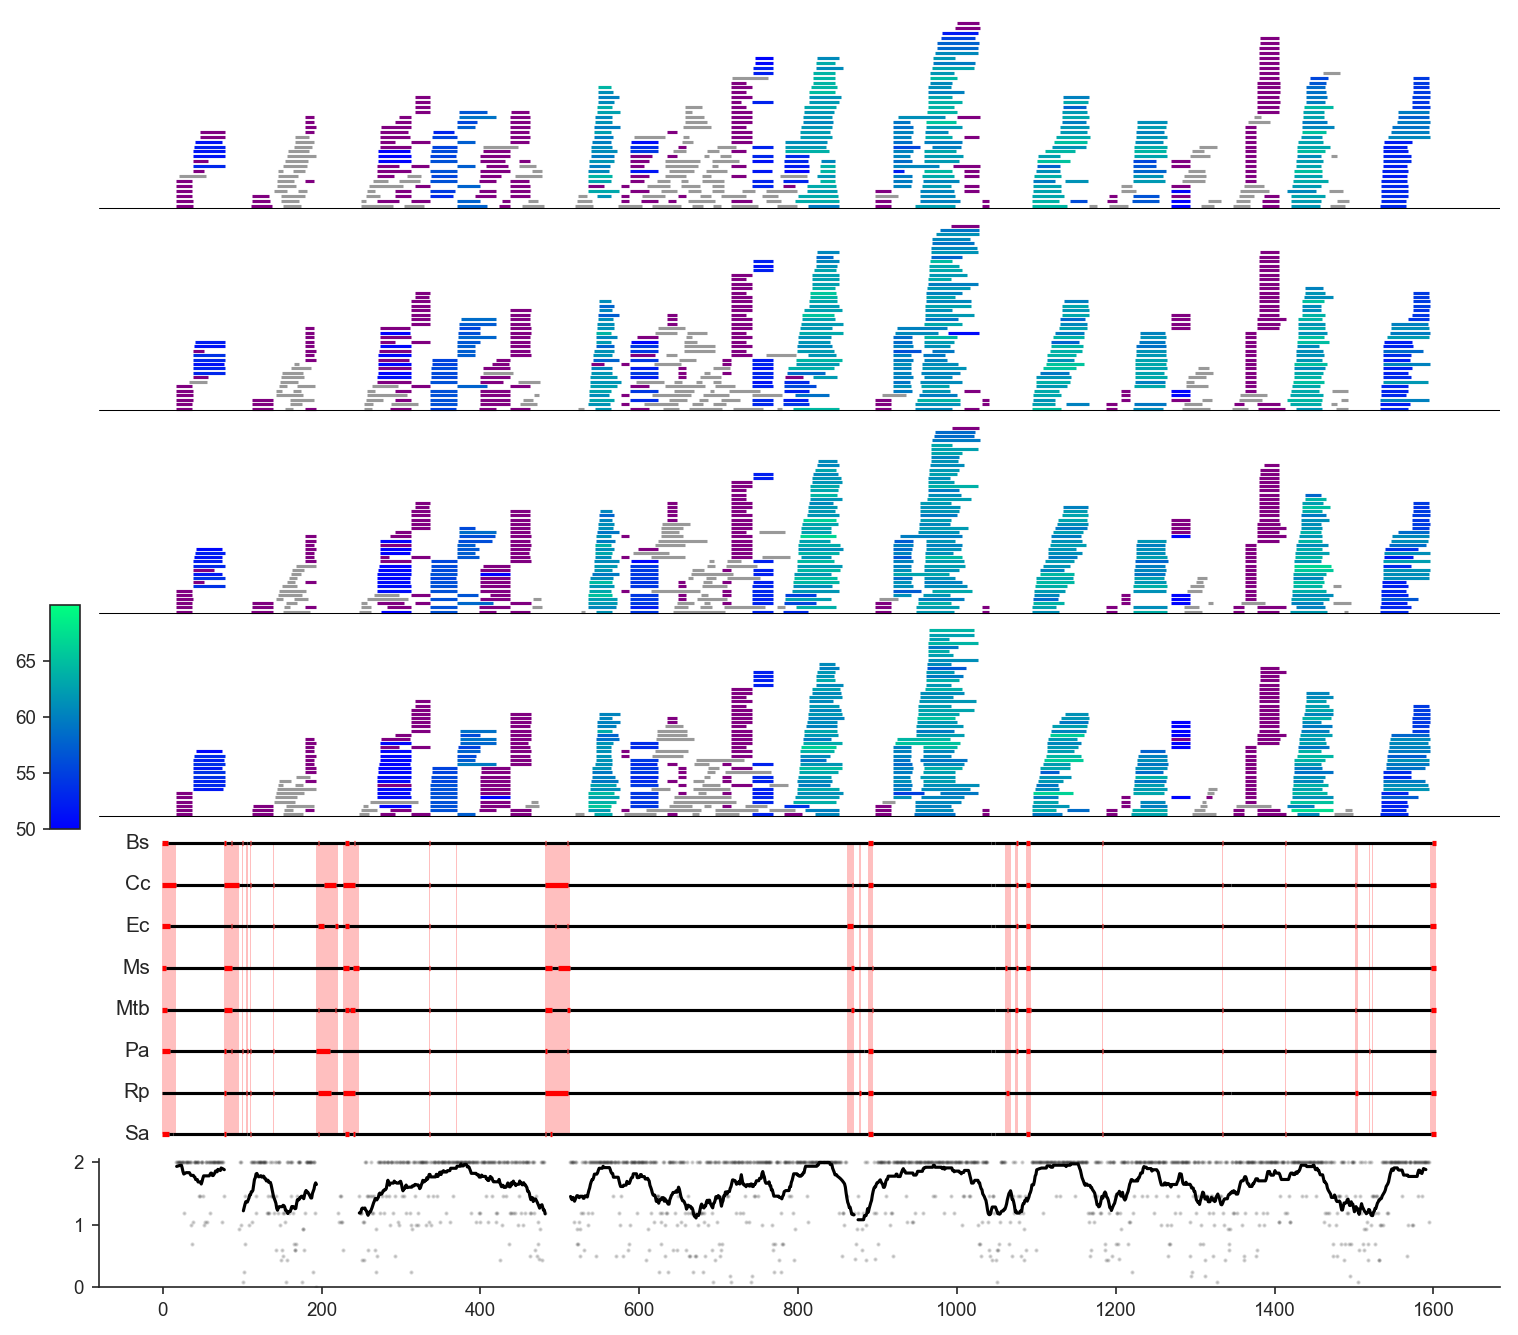

In [5]:
align_obj.plotStoredProbesAlignment(height_ratios = [3,5,2], figwidth=10, figheights=[1.5,3], cmap_name = 'winter', c_below='purple', cmap_lim = (50,70), window_size=25)
align_obj.exportProbeData('16S_possible_oligo_sequences.csv')

## 16S plot for paper

Plots for paper were generated with fewer probes and optimization cycles to highlight probe optimization. Definition of random seed results in same oligos generated each run.

In [7]:
np.random.seed(1337)
# 
opt_kwargs = {'n_probes':250, 'probe_mutation_steps':25, 'optimization_cycles':20,
              'target_tm':62.5, 'tm_dist':norm, 'tm_dist_kwargs':{'loc':62.5,'scale':2,},
              'probe_start_len':(15,25), 'show_plots':[0,5,10,20]}
align_obj = rd.optimizeprobes('all_16S.fasta',**opt_kwargs)

Text(104.16666666666667, 0.5, '16S\nalignments')

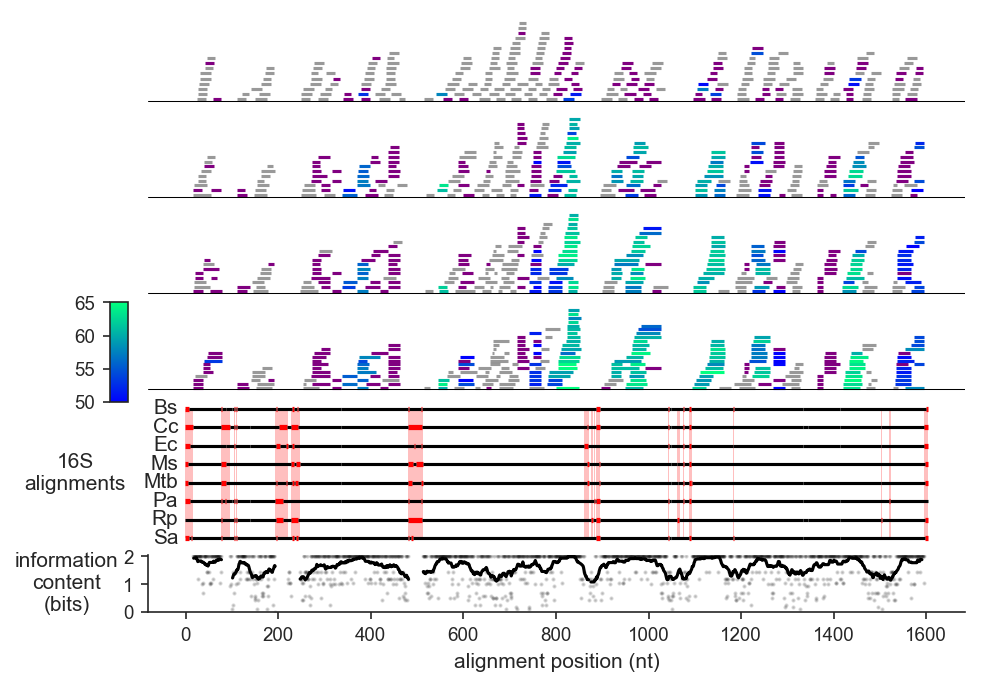

In [8]:
probe_ax, align_ax, diversity_ax = align_obj.plotStoredProbesAlignment(height_ratios = [3,5,2], figwidth=6, figheights=[.75,1.5],
                                                                       cmap_name = 'winter', c_below='purple',
                                                                       cmap_lim = (50,65), cmap_ticks=[50,55,60,65])
diversity_ax.set_xlabel('alignment position (nt)')
diversity_ax.set_ylabel('information\ncontent\n(bits)',rotation=0,ha='center',va='center',labelpad=27)
align_ax.set_ylabel('16S\nalignments',rotation=0,ha='center',va='center',labelpad=35)

## 23S as used to find depletion probes

Below are settings used to identify probes used to deplete rRNA. Probes are plotted and outputted into an included .csv file.

In [9]:
opt_kwargs = {'n_probes':1000, 'probe_mutation_steps':25, 'optimization_cycles':100,
              'target_tm':62.5, 'tm_dist':norm, 'tm_dist_kwargs':{'loc':62.5,'scale':2,},
              'probe_start_len':(15,25), 'show_plots':[25,50,75,100]}
align_obj = rd.optimizeprobes('all_23S.fasta',**opt_kwargs)

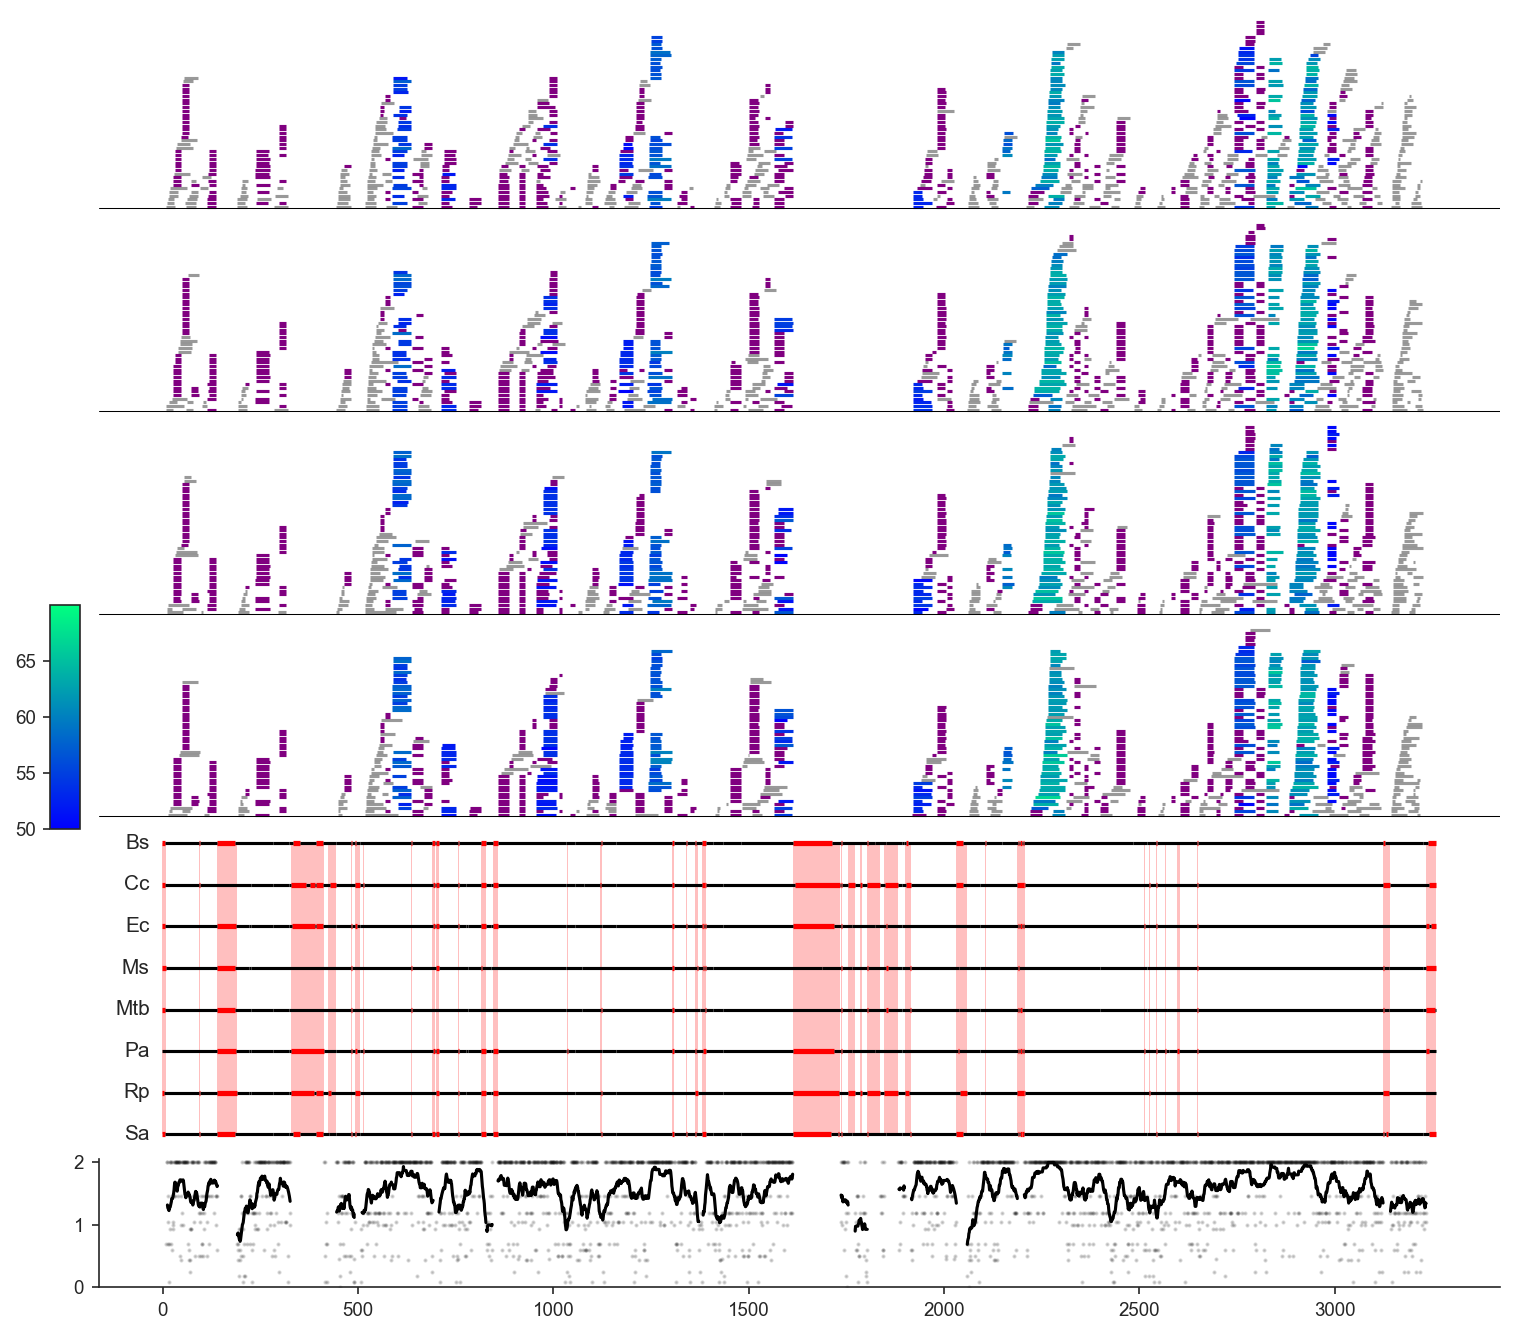

In [10]:
align_obj.plotStoredProbesAlignment(height_ratios = [3,5,2], figwidth=10, figheights=[1.5,3], cmap_name = 'winter', c_below='purple', cmap_lim = (50,70), window_size=25)
align_obj.exportProbeData('23S_possible_oligo_sequences.csv')

# 23S plots for paper

Plots for paper were generated with fewer probes and optimization cycles to highlight probe optimization. Definition of random seed results in same oligos generated each run.

In [11]:
np.random.seed(8675309)
#
opt_kwargs = {'n_probes':500, 'probe_mutation_steps':25, 'optimization_cycles':45,
              'target_tm':62.5, 'tm_dist':norm, 'tm_dist_kwargs':{'loc':62.5,'scale':2,},
              'probe_start_len':(15,25), 'show_plots':[0,15,30,45]}
align_obj = rd.optimizeprobes('all_23S.fasta',**opt_kwargs)

Text(104.16666666666667, 0.5, '23S\nalignments')

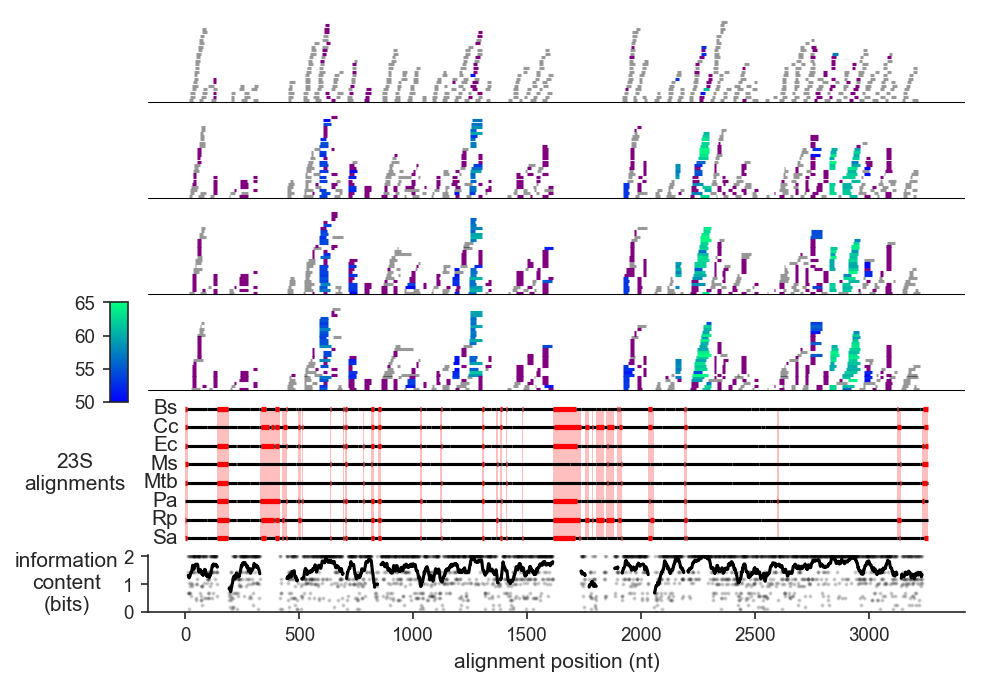

In [12]:
probe_ax, align_ax, diversity_ax = align_obj.plotStoredProbesAlignment(height_ratios = [3,5,2], figwidth=6, figheights=[.75,1.5],
                                                                       cmap_name = 'winter', c_below='purple',
                                                                       cmap_lim = (50,65), cmap_ticks=[50,55,60,65])
diversity_ax.set_xlabel('alignment position (nt)')
diversity_ax.set_ylabel('information\ncontent\n(bits)',rotation=0,ha='center',va='center',labelpad=27)
align_ax.set_ylabel('23S\nalignments',rotation=0,ha='center',va='center',labelpad=35)

## 5S plots for paper

Optimization of 5S for individual or sets of bacteria.

In [13]:
sets_for_5S = [['genomes/Ec_mg1655v3.gb', 'genomes/Pa_14.gb'],
               ['genomes/Ms_mc2155.gb', 'genomes/Mtb_h37rv.gb'],
               ['genomes/Bs_168.gb'],
               ['genomes/Sa_nctc8325.gb'],
               ['genomes/Rp_portsmouth.gb']]

titles = ['5S_EcPa.fasta', '5S_MtbMs.fasta', '5S_Bs.fasta', '5S_Sa.fasta', '5S_Rp.fasta']

for genome_set,alignment_title in zip(sets_for_5S, titles):
    output_names, output_sequences = rd.alignrRNA(genome_set, False)
    rd.writeFasta(alignment_title, output_names[2], output_sequences[2])

In [14]:
for fasta_title in titles:
    opt_kwargs = {'n_probes':100, 'probe_mutation_steps':25, 'optimization_cycles':100,
                  'target_tm':62.5, 'tm_dist':norm, 'tm_dist_kwargs':{'loc':62.5,'scale':2,},
                  'probe_start_len':(15,25), 'show_plots':[0,25]}
    align_obj = rd.optimizeprobes(fasta_title, **opt_kwargs)
    align_obj.exportProbeData(fasta_title.split('.')[0]+'.csv')

/home/culviner/common_py3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/culviner/common_py3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
